In [1]:
import numpy as np
import matplotlib
import pandas as pd


dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

train = dataset.iloc[:743,:]
test = dataset.iloc[743:,:]
print(train)
print(test)
X_train = pd.DataFrame(train.iloc[:,4:15].values)
Y_train = train.iloc[:,16:].values
print(X_train.shape)
print(Y_train.shape)
X_test = pd.DataFrame(test.iloc[:,4:15].values)
Y_test = test.iloc[:,16:].values
print(X_test.shape)
print(Y_test.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

          Date  Site  Latitude (decimal deg)  Longitude (decimal deg)  \
0    5/29/2013   WE6                 41.7134                 -83.3804   
1    5/29/2013   WE8                 41.8343                 -83.3633   
2    5/29/2013   WE4                 41.8267                 -83.1930   
3    6/10/2013   WE6                 41.7144                 -83.3805   
4    6/10/2013   WE8                 41.8353                 -83.3631   
..         ...   ...                     ...                      ...   
738  10/7/2019  WE16                 41.6599                 -83.1467   
739  10/7/2019  WE13                 41.7428                 -83.1354   
740  10/7/2019  WE12                 41.7023                 -83.2639   
741  10/7/2019   WE4                 41.8270                 -83.1949   
742  6/16/2020   WE6                 41.7054                 -83.3864   

     Secchi Depth (m)  CTD Temperature (°C)  \
0                1.60                  18.5   
1                1.00        

In [2]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


In [3]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor

2024-07-01 14:52:38.289271: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# Initialize Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model
rf_model.fit(X_train, Y_train)




/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [17]:
res = rf_model.predict(X_test)
res.reshape(96,1)
print(res)
print(res.shape)

[ 6.11137 22.90851  4.67313  6.51912  8.66896 26.06236  8.06194 10.45996
 11.35612 28.27385  3.93552 32.29126 11.43853 31.34228  6.39908 54.17721
 10.24404 47.14486 11.06334 38.0181  15.97996 53.49971  6.00146 12.57759
 10.34011 13.93633 55.81933 22.15657 58.37488  8.98142 17.39809 36.53987
  2.66762 39.26205 22.96443 45.20247 14.71795 12.69213 31.54825  4.73077
 48.30437 26.76232 78.2538  27.52939 20.29313 23.95378  6.31231 48.55609
 43.67049 80.69033 21.26673 10.0593  14.24049 10.99253 27.90247 33.82108
 51.34061 16.69234  8.20979 25.97772  5.30201 44.05044 14.96743 40.18041
 14.83045  8.52332 18.57588  3.20172 35.62961 28.65276 25.52002 18.0253
 13.23477 27.5023   4.16507 36.25041 29.07254 35.00064 16.62708 21.34661
 25.47365  5.08246 11.57083 17.22822 19.56071  8.15915  9.06781 10.88097
  4.11686 12.42637  6.3654  10.12663  5.65293  2.39941 11.57408  2.06207]
(96,)


In [6]:
print(Y_test)

[[29.9 ]
 [29.9 ]
 [ 1.53]
 [12.71]
 [21.54]
 [12.93]
 [12.9 ]
 [ 6.43]
 [10.83]
 [36.61]
 [ 1.86]
 [31.98]
 [11.43]
 [52.65]
 [ 7.87]
 [47.71]
 [10.54]
 [44.72]
 [12.61]
 [35.36]
 [14.3 ]
 [58.5 ]
 [ 4.64]
 [12.82]
 [10.81]
 [16.77]
 [64.22]
 [32.91]
 [66.79]
 [ 2.8 ]
 [24.77]
 [37.49]
 [ 3.56]
 [39.39]
 [15.67]
 [45.11]
 [14.5 ]
 [14.5 ]
 [21.39]
 [ 5.13]
 [43.03]
 [21.  ]
 [89.02]
 [31.28]
 [18.66]
 [19.5 ]
 [ 8.1 ]
 [45.37]
 [43.53]
 [96.43]
 [14.22]
 [12.49]
 [11.47]
 [12.79]
 [28.47]
 [18.85]
 [54.34]
 [13.85]
 [ 9.4 ]
 [17.49]
 [ 7.08]
 [41.6 ]
 [19.71]
 [38.09]
 [21.65]
 [ 8.65]
 [22.36]
 [ 3.47]
 [29.51]
 [26.78]
 [32.63]
 [22.69]
 [18.27]
 [25.42]
 [ 6.57]
 [ 8.27]
 [ 5.16]
 [28.08]
 [12.19]
 [24.83]
 [22.62]
 [ 0.77]
 [ 8.07]
 [11.42]
 [16.64]
 [ 4.25]
 [ 9.91]
 [ 6.15]
 [ 4.37]
 [ 9.95]
 [ 6.79]
 [ 9.98]
 [ 6.36]
 [ 3.91]
 [ 9.65]
 [ 1.74]]


In [18]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, res) 
print(r2)

0.8493279672164032


In [8]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,res)
print(mae)

4.775044791666665


In [9]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)

0.4132272631293737


In [10]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test,res)
print(rmse)

7.123066163506239


In [11]:
import lime
import shap

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)



In [13]:
import matplotlib.pyplot as plt 

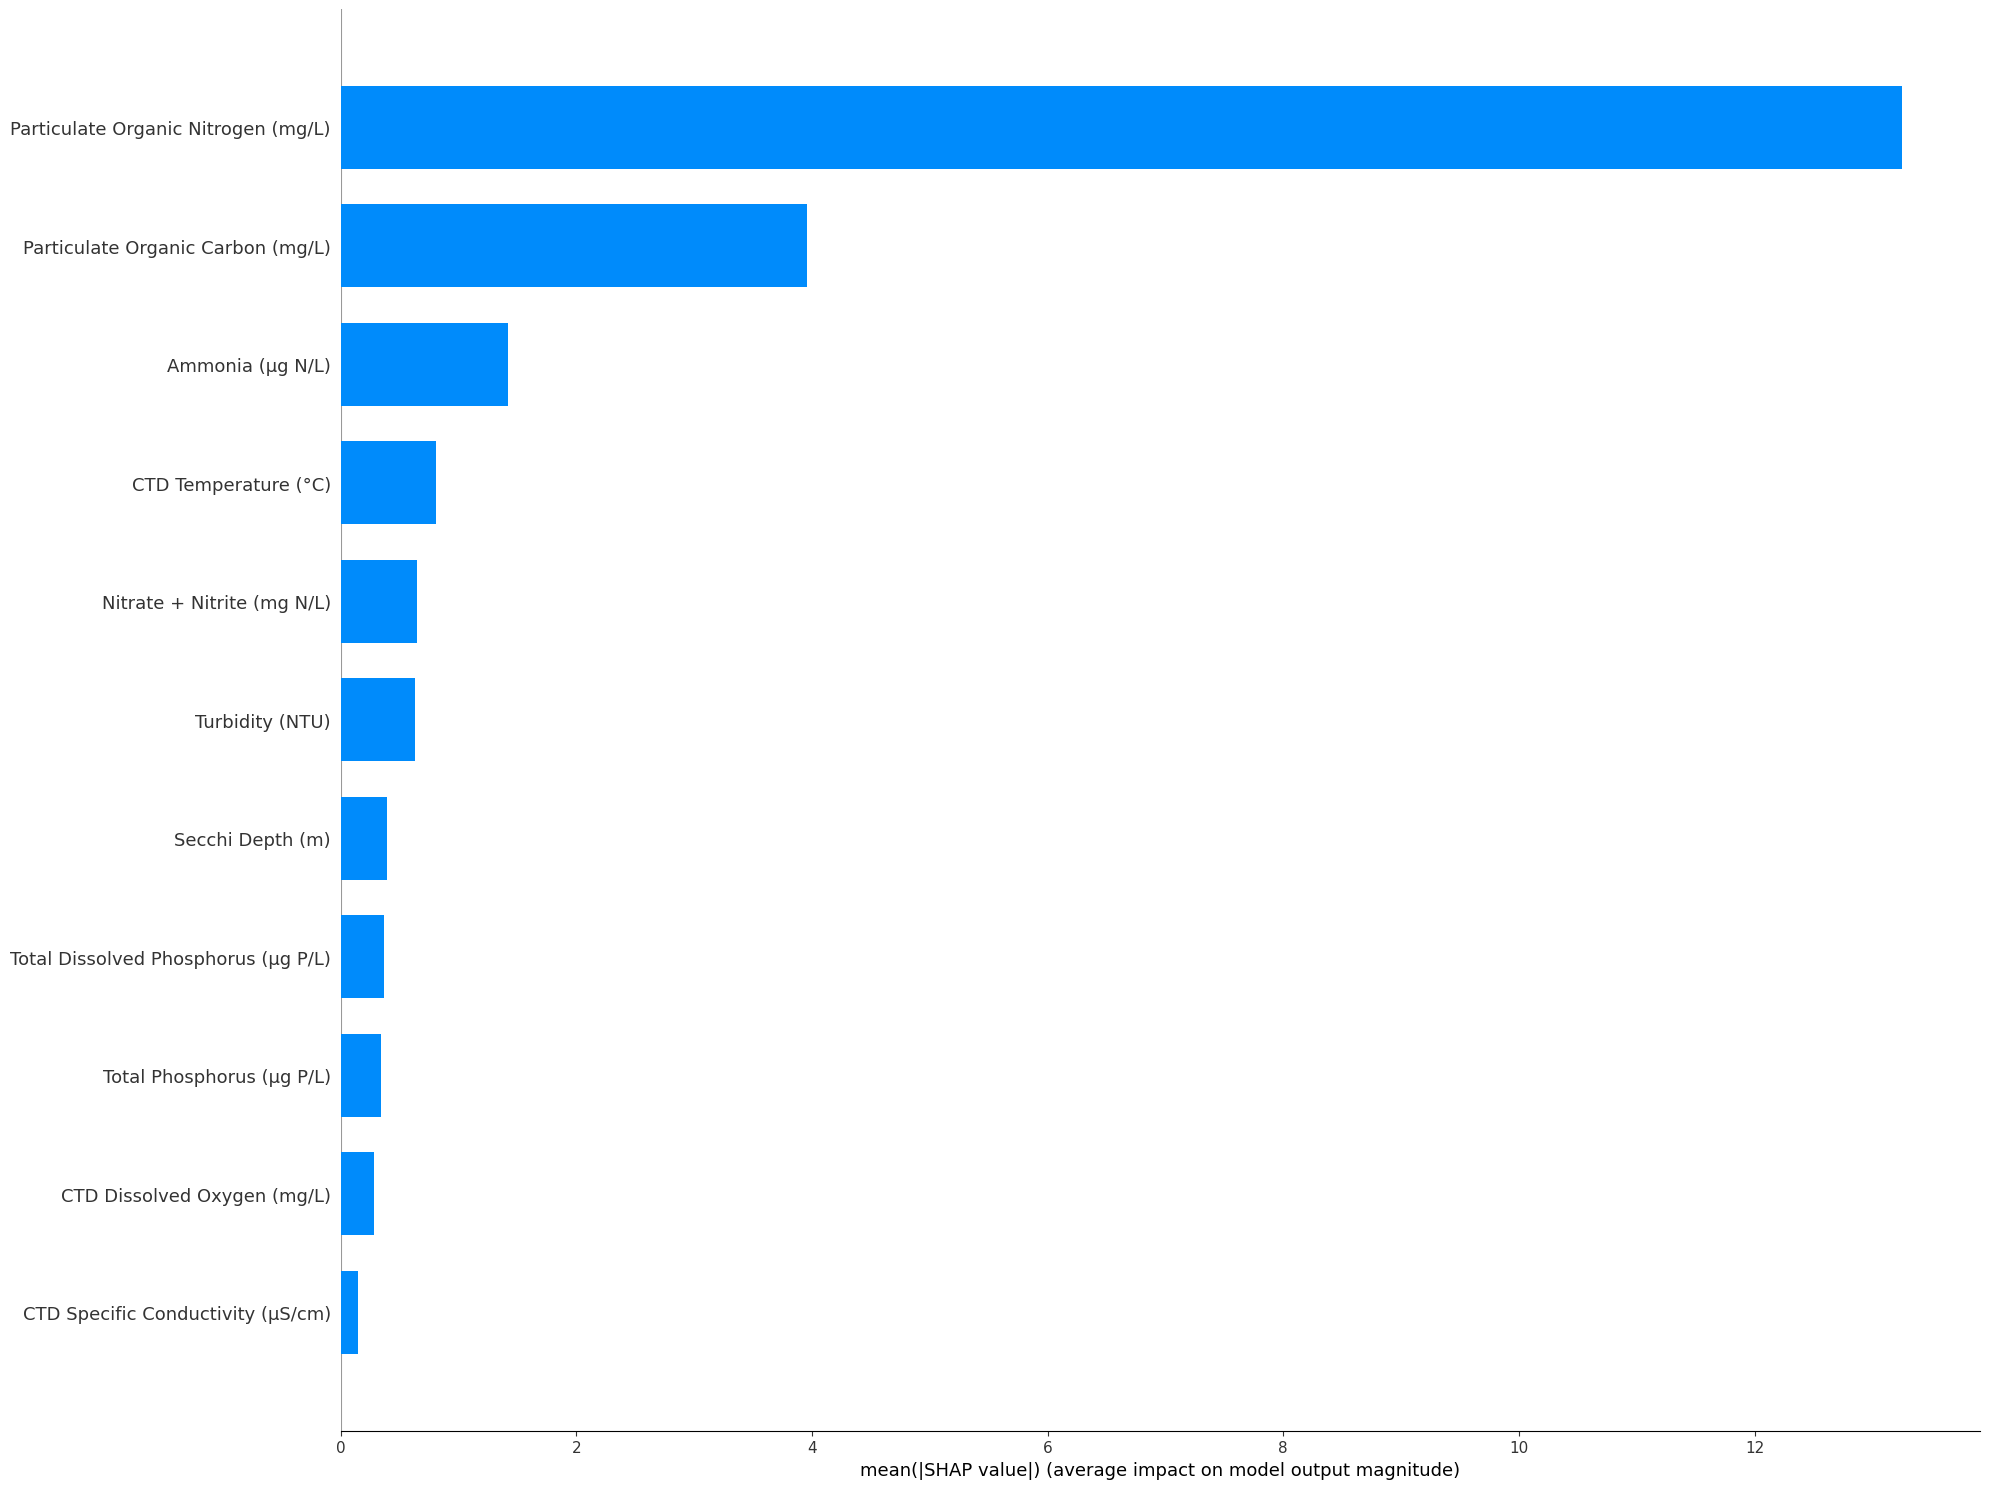

In [14]:
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)

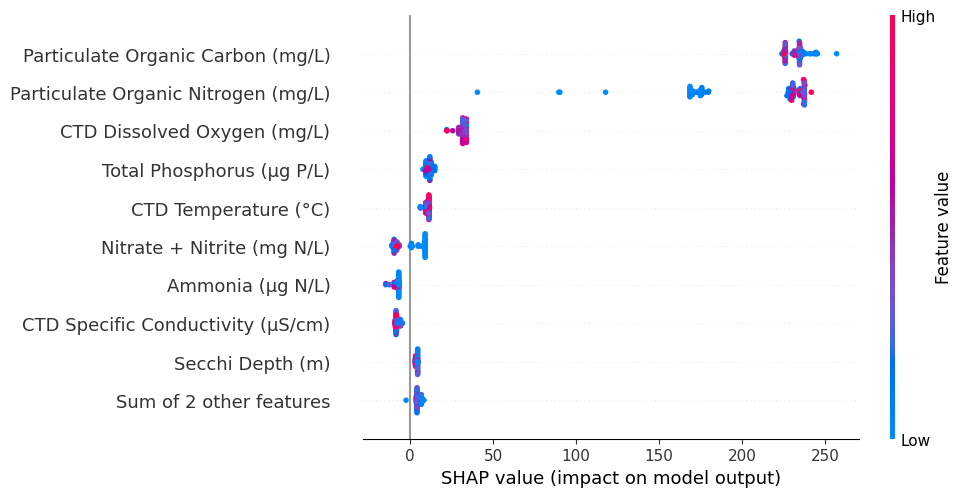

In [19]:
X_test_shap = pd.DataFrame(test.iloc[:,4:15])
shap_values = explainer(X_test_shap)
shap.plots.beeswarm(shap_values=shap_values)

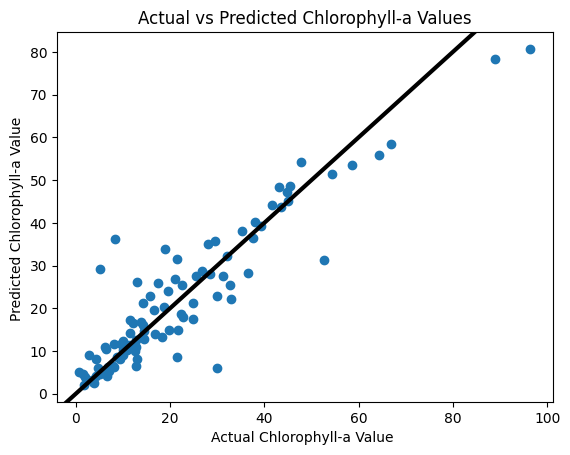

In [20]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, res)
plt.xlabel('Actual Chlorophyll-a Value ')
plt.ylabel('Predicted Chlorophyll-a Value ')
plt.title('Actual vs Predicted Chlorophyll-a Values')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='k', lw=3, scalex=False, scaley=False)
plt.show()